In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
cubic = ["Al","Cu","K","Pd","V","W"]
#bcc = ["K","V","W"]
#fcc = ["Al","Cu","Pd"]
hexagonal = ["Ti","Y","Re"]
all_elements = cubic+hexagonal

In [3]:
sc = {}
bcc = {"K":[1],"W":[1],"V":[1]}
fcc = {"Al":[1],"Cu":[1],"Pd":[1]}
hx = {"Ti":[1,2],"Re":[1,2],"Y":[1,2,5],"Al":[3],"Cu":[3],"K":[3,9],
      "V":[3,9]}
trig = {"Al":[2],"Cu":[2],"Pd":[2],"W":[7]}
st = {"Cu":[6],"K":[4],"W":[8]}
bct = {"Al":[5],"Cu":[4],"K":[5],"Pd":[7],"W":[3],"V":[5,11]}
so = {"Y":[4],"Al":[6],"Pd":[8]}
cco = {"Y":[3],"Al":[4,8],"K":[2],"Pd":[4],"W":[2,11],"V":[2,6]}
bco = {"Ti":[4],"Re":[6],"Al":[7,9],"Cu":[5,7],"Pd":[3,5],"W":[4],"V":[4]}
fco = {"W":[5]}
sm = {"Cu":[8],"V":[8]}
ccm = {"Y":[7],"Ti":[3,4,7],"Re":[3,4,5,7],"Al":[10,11],"Cu":[9,10,11],
       "K":[7,8,10,11],"Pd":[6,9,10,11],"W":[6,9],"V":[7]}
tric={"Y":[6],"Ti":[6],"K":[6],"W":[10],"V":[10]}

In [4]:
cubic = {"K":[1],"W":[1],"V":[1],"Al":[1],"Cu":[1],"Pd":[1]}
tet = {"Cu":[4,6],"K":[4,5],"W":[3,8],"Al":[5],"Pd":[7],"V":[5,11]}
ortho = {"Y":[3,4],"Al":[4,6,7,8,9],"Pd":[3,4,5,8],"K":[2],"W":[2,4,5,11],
        "V":[2,4,6],"Ti":[4],"Re":[6],"Cu":[5,7],}
mono = {"Cu":[8,9,10,11],"V":[7,8],"Y":[7],"Ti":[3,4,7],"Re":[3,4,5,7],
        "Al":[10,11],"K":[7,8,10,11],"Pd":[6,9,10,11],"W":[6,9]}

In [190]:
def get_mean_data(method,elements,size_lists,sub_method=None):
    for el in elements:
        if el in size_lists:
            sizes = size_lists[el]
        else:
            continue
        
        outdf = None
        for i in sizes:
            data = []
            kpd = []
            if sub_method is None:
                f = open("../data/{0}_{1}/{2}_atom_full_convergence.csv".format(el,method,i),"r")
            else:
                f = open("../data/{0}_{1}/{2}_{3}_atom_full_convergence.csv".format(el,method,i,sub_method),"r")
            reader = csv.reader(f,delimiter='\t')
            for row in reader:
                #if np.allclose(int(row[0]),0):
                #    print("row",row)
                #    print("file","../data/{0}_{1}/{2}_atom_convergence.csv".format(el,method,i))
                if int(row[0]) in kpd:
                    loc = kpd.index(int(row[0]))
                    data[loc][1] = (data[loc][1]+float(row[1]))/2.
                else:
                    kpd.append(int(row[0]))
                    point = [int(row[0]),float(row[1])]
                    data.append(point)
                    
            data = np.array(data)
            if len(data) >= 1:
                df = pd.DataFrame(data[:,1:],index=data[:,0])#,columns=[str(i)+' atom'])    
            else:
                print("element",el,"size",i)
                
            if outdf is not None:#i > 1 or el != elements[0]:
                outdf = pd.concat([outdf,df], axis=1)
            else:
                outdf = df

    outdf['mean'] = outdf.mean(axis=1) 
    return outdf

In [11]:
def sort_energies(data):
    data = data[np.argsort(data[:,1])]
    for i in range(len(data)):
        if data[i][1] == data[i-1][1]:
            temp = deepcopy(data[i])
            data[i] = deepcopy(data[i-1])
            data[i-1] = temp
    for i in range(len(data)):
        if data[i][1] == data[i-1][1]:
            temp = deepcopy(data[i])
            data[i] = deepcopy(data[i-1])
            data[i-1] = temp

    return data

In [164]:
def radial_dist(center,point):
    #if np.allclose(center[0],0):
    #    print("H1")
    #if np.allclose(center[1],0):
    #    print("H2")
    #if np.allclose(point[0],0):
    #    print("H3",point)
    #if np.allclose(point[1],0):
    #    print("H4")
    #xd = np.log10(center[0])-np.log10(point[0])
    #if np.allclose(point[0], 0) and not np.allclose(center[0],0):
    #    xd = np.log10(center[0])
    #elif np.allclose(center[0],0) and not np.allclose(point[0],0):
    #    xd = np.log10(point[0])
    #elif np.allclose(center[0],0) and np.allclose(point[0],0):
    #    xd = 1E-10
    #else:
    xd = abs(np.log10(center[0]))-abs(np.log10(point[0]))

    if np.allclose(point[1], 0) and not np.allclose(center[1],0):
        yd = np.log10(center[1])
    elif np.allclose(center[1],0) and not np.allclose(point[1],0):
        yd = np.log10(point[1])
    elif np.allclose(center[1],0) and np.allclose(point[1],0):
        yd = 1E-10
    else:
        yd = abs(np.log10(center[1]))-abs(np.log10(point[1]))
        
    yd = np.log10(center[1])-np.log10(point[1])
    r = np.sqrt(xd*xd+yd*yd)
    return r

In [ ]:
import math
def half_magnitude(x):
    """Finds the magnitude of the value and returns 5*10^(magnitude)."""
    return .1*10**int(math.log10(x))

In [117]:
def get_ratios(top,bottom):
    kpd= []
    err = []
    for pf in top:
        #hm = half_magnitude(pf[1])
        #hm2 = half_magnitude(pf[0])
        tr = pf[0]
        br = None
        ber = None
        dist = None
        if not pf[1] in err:
            for pm in bottom:
                #test = abs(pm[1]-pf[1])
                test = radial_dist(pf,pm)
                #test2 = abs(pm[0]-pf[1])
                if dist is None:
                    dist = test
                    br = pm[0] 
                    ber = pm[1]
                elif test < dist:
                    dist = test
                    br = pm[0]
                    ber = pm[1]
                #if test < hm:
                #    trial_set1 = [float(pf[0]),float(pm[0])]
                #    if br is not None:
                #        trial_set2 = [float(br),float(pf[0])]
                #    if br is None and ber is None:
                #        br = pm[0]
                #        ber = pm[1]
                #    elif ber < pf[1] and abs(ber-pf[1]) > test:
#                    elif abs(ber-pf[1]) > test and abs(pf[0]-pm[0])<abs(br-pf[0]):
                        #print("h")
                #        br = pm[0]
                #        ber = pm[1]
            if ber is not None and br is not None:
                err.append(pf[1])#((pf[1]+ber)/2.)
                kpd.append(float(tr)/float(br))
    return kpd, err

In [14]:
def binned_array(kpd_all,n):
    binned_kpd_all = []
    n_kpd = len(kpd_all)
    for i in range(n_kpd):
        temp = []
        for j in range(-n,n+1):
            if i+j >0 and i+j <n_kpd-1:
                temp.append(kpd_all[i+j])
        binned_kpd_all.append(np.mean(temp))
    return binned_kpd_all

In [165]:
def make_plot(crystal,sub_methods=None,avg_bin=5):
    
    if sub_methods is None:
        froyen_plots = ["hcp","sc","bcc","fcc"]
    else:
        froyen_plots = sub_methods
        
    cubic = ["Al","Cu","K","Pd","V","W"]
    hexagonal = ["Ti","Y","Re"]
    all_elements = cubic+hexagonal
    
    Mueller = get_mean_data("Mueller",all_elements,crystal)
    Aflow = get_mean_data("AFLOW",all_elements,crystal)
    
    if "Ti" in crystal or "Re" in crystal or "Y" in crystal:
        Froyen_hcp = get_mean_data("Froyen",hexagonal,crystal,sub_method="hcp")
        Mueller_hcp = get_mean_data("Mueller",hexagonal,crystal)
        Froy_hcp = np.asarray(Froyen_hcp.reset_index().loc[:,["index","mean"]])
        Muel_hcp = np.asanyarray(Mueller_hcp.reset_index().loc[:,["index","mean"]])
    else:
        Froy_hcp = []
        Muel_hcp = []
    
    if "Al" in crystal or "Cu" in crystal or "K" in crystal or "Pd" in crystal or "W" in crystal or "V" in crystal:
        Froyen_sc = get_mean_data("Froyen",cubic,crystal,sub_method="sc")
        Froyen_bcc = get_mean_data("Froyen",cubic,crystal,sub_method="bcc")
        Froyen_fcc = get_mean_data("Froyen",cubic,crystal,sub_method="fcc")
        Mueller_cubic = get_mean_data("Mueller",cubic,crystal)
        Froy_sc = np.asarray(Froyen_sc.reset_index().loc[:,["index","mean"]])
        Froy_bcc = np.asarray(Froyen_bcc.reset_index().loc[:,["index","mean"]])
        Froy_fcc = np.asarray(Froyen_fcc.reset_index().loc[:,["index","mean"]])
        Muel_cubic = np.asanyarray(Mueller_cubic.reset_index().loc[:,["index","mean"]])
    else:
        Froy_sc = []
        Froy_bcc = []
        Froy_fcc = []
        Muel_cubic = []
    
    Muel = np.asanyarray(Mueller.reset_index().loc[:,["index","mean"]])
    Afl = np.asanyarray(Aflow.reset_index().loc[:,["index","mean"]])

    Muel = sort_energies(Muel)
    Afl = sort_energies(Afl)
    if len(Froy_hcp) >= 1:
        Froy_hcp = sort_energies(Froy_hcp)
        Muel_hcp = sort_energies(Muel_hcp)
    
        kpd_hcp, err_hcp = get_ratios(Froy_hcp,Muel_hcp)
    else:
        kpd_hcp = []
        
    if len(Froy_sc) >= 1:
        Froy_sc = sort_energies(Froy_sc)
        Froy_bcc = sort_energies(Froy_bcc)
        Froy_fcc = sort_energies(Froy_fcc)
        Muel_cubic = sort_energies(Muel_cubic)
        
        kpd_sc, err_sc = get_ratios(Froy_sc,Muel_cubic)
        kpd_bcc, err_bcc = get_ratios(Froy_bcc,Muel_cubic)
        kpd_fcc, err_fcc = get_ratios(Froy_fcc,Muel_cubic)
    else:
        kpd_sc = []
        kpd_bcc = []
        kpd_fcc = []

    
    kpd_afl, err_afl = get_ratios(Afl,Muel)
    
    if "sc" in froyen_plots and len(kpd_sc) >1:
        plt.plot(err_sc,kpd_sc,label="Froyen sc")
    if "bcc" in froyen_plots and len(kpd_bcc) >1:
        plt.plot(err_bcc,kpd_bcc,label="Froyen bcc")
    if "fcc" in froyen_plots and len(kpd_fcc) >1:
        plt.plot(err_fcc,kpd_fcc,label="Froyen fcc")
    if "hcp" in froyen_plots and len(kpd_hcp) >1:
        plt.plot(err_hcp,kpd_hcp,label="Froyen hcp")
    
    plt.plot(err_afl,kpd_afl,label="AFLOW")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Error (eV/atom)")
    plt.ylabel("Ratio of irreducible k-points (Method/GMP)")
    plt.legend(loc="upper right")
    plt.title("Average speedup of k-point methods vs Generalized Monkhorst-Pack")
    plt.xlim([.4E-3,1E-1])
#    plt.ylim([0,20])
    plt.show()

('element', 'V', 'size', 9)


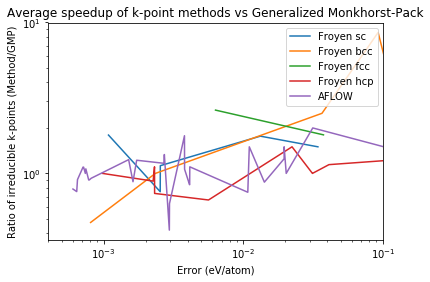

In [166]:
make_plot(hx)

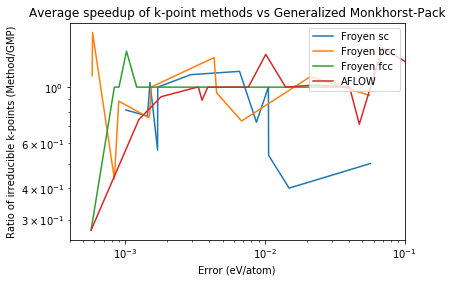

In [167]:
make_plot(cubic)

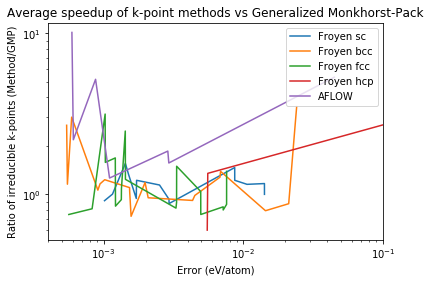

In [168]:
make_plot(ortho)

('element', 'Cu', 'size', 9)
('element', 'Cu', 'size', 9)
('element', 'Cu', 'size', 11)
('element', 'K', 'size', 11)


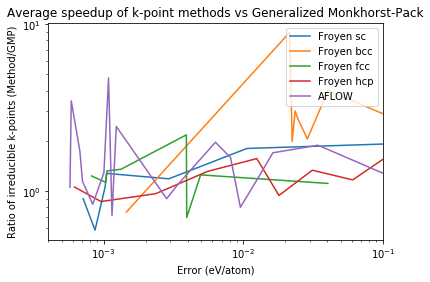

In [169]:
make_plot(mono)

('element', 'V', 'size', 11)
('element', 'V', 'size', 5)


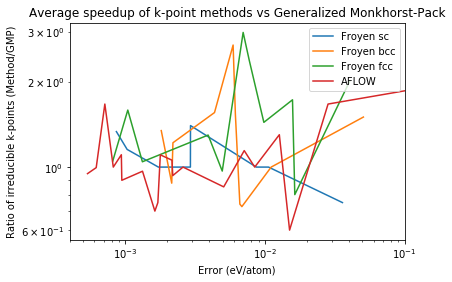

In [170]:
make_plot(tet)

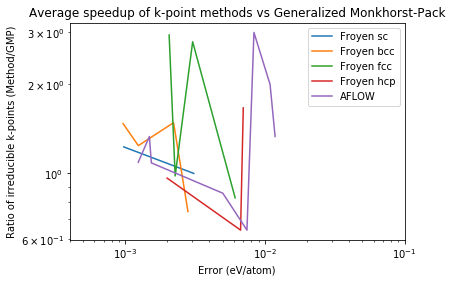

In [171]:
make_plot(tric)

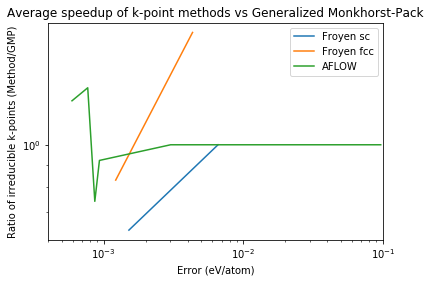

In [172]:
make_plot(trig)

# Generating plot of 10 systems.

{'Al': [9]}
{'Pd': [10]}
{'K': [9]}
{'Cu': [6]}
{'K': [2]}
{'K': [4]}
{'Y': [2]}
{'Pd': [6]}
{'K': [8]}
{'W': [3]}


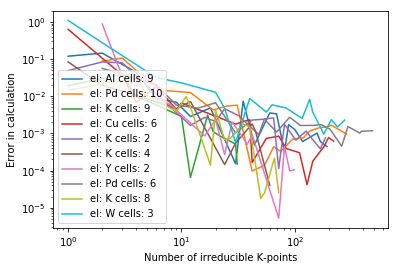

In [197]:
for i in range(10):
    el = all_elements[np.random.randint(9)]
    if el == "Ti" or el == "Re" or el == "Y":
        s = np.random.randint(1,8)
    else:
        s = np.random.randint(1,12)
        
    crystal = {el: [s]}
    print(crystal)
    d = get_mean_data("Mueller",all_elements,crystal)
    
    Muel = np.asanyarray(d.reset_index().loc[:,["index","mean"]])
    plt.plot(Muel[:,0],Muel[:,1], label="el: {0} cells: {1}".format(el,s))
plt.yscale('log')
plt.xscale('log')
plt.legend(loc="lower left")
plt.xlabel("Number of irreducible K-points")
plt.ylabel("Error in calculation")
plt.savefig("../plots/10_systems.pdf")
plt.show()

In [5]:
from phenum.symmetry import get_lattice_pointGroup, get_spaceGroup

In [2]:
temp = get_lattice_pointGroup([[1,0,0],[0,0,1],[0.5,-1.5,0.5]])

In [7]:
temp2 = get_spaceGroup([[1,0,0],[0,0,1],[0.5,-1.5,0.5]],[0,0,1],[[0,0,0],[1./3.,1./3.,1./3.],[2./3.,2./3.,2./3.]],lattcoords=True)

In [4]:
temp

[[[-1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, -1.0]],
 [[-1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, -1.0]],
 [[-1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]],
 [[-1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, 1.0]],
 [[0.0, 0.0, -1.0], [0.0, 1.0, 0.0], [-1.0, 0.0, 0.0]],
 [[0.0, 0.0, -1.0], [0.0, -1.0, 0.0], [-1.0, 0.0, 0.0]],
 [[0.0, 0.0, -1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0]],
 [[0.0, 0.0, -1.0], [0.0, -1.0, 0.0], [1.0, 0.0, 0.0]],
 [[0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [-1.0, 0.0, 0.0]],
 [[0.0, 0.0, 1.0], [0.0, -1.0, 0.0], [-1.0, 0.0, 0.0]],
 [[0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0]],
 [[0.0, 0.0, 1.0], [0.0, -1.0, 0.0], [1.0, 0.0, 0.0]],
 [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, -1.0]],
 [[1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, -1.0]],
 [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]],
 [[1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, 1.0]]]

In [10]:
temp2[0]

16

In [13]:
import numpy as np
A = [[1,0,0],[0,0,1],[0.5,-1.5,0.5]]

In [20]:
temp3 = [np.dot(A,np.dot(i,np.linalg.inv(A))) for i in temp2[0]]

In [21]:
temp3

[array([[-1.,  0.,  0.],
        [ 0., -1.,  0.],
        [-1., -1.,  1.]]), array([[-1.,  0.,  0.],
        [ 0., -1.,  0.],
        [ 0.,  0., -1.]]), array([[-1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [-1.,  0.,  1.]]), array([[-1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1., -1.]]), array([[ 0., -1.,  0.],
        [-1.,  0.,  0.],
        [-1., -1.,  1.]]), array([[ 0., -1.,  0.],
        [-1.,  0.,  0.],
        [ 0.,  0., -1.]]), array([[ 0., -1.,  0.],
        [ 1.,  0.,  0.],
        [ 0., -1.,  1.]]), array([[ 0., -1.,  0.],
        [ 1.,  0.,  0.],
        [ 1.,  0., -1.]]), array([[ 0.,  1.,  0.],
        [-1.,  0.,  0.],
        [-1.,  0.,  1.]]), array([[ 0.,  1.,  0.],
        [-1.,  0.,  0.],
        [ 0.,  1., -1.]]), array([[ 0.,  1.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  1.]]), array([[ 0.,  1.,  0.],
        [ 1.,  0.,  0.],
        [ 1.,  1., -1.]]), array([[ 1.,  0.,  0.],
        [ 0., -1.,  0.],
        [ 0., -1.,  1.]]), array([[ 1.